In [ ]:
import random
import datetime
import heapq
import matplotlib.pyplot as plt

In [ ]:
def k_merge(lista_arreglos):
    if len(lista_arreglos) == 1:
        return lista_arreglos[0]

    medio = len(lista_arreglos) // 2  
    izq = lista_arreglos[:medio]  
    der = lista_arreglos[medio:]  
    izq = k_merge(izq) #O(logk*(n*+n+n))
    der = k_merge(der)
    return merge(izq,der) # O(k*h)

In [ ]:
def merge(left, right):
    res = []
    left_index = 0
    right_index = 0
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            res.append(left[left_index])
            left_index += 1 
        else:                     
            res.append(right[right_index])
            right_index += 1
    while(left_index < len(left)):
        res.append(left[left_index])
        left_index += 1
    while(right_index < len(right)):
        res.append(right[right_index])
        right_index += 1   
    return res

In [ ]:

def k_merge_catedra(lista_elementos):
    heap = []
    res = []
    for i in range(len(lista_elementos)):
        heapq.heappush(heap,(lista_elementos[i][0],i,0))

    while heap: 
        minimo,indice_arreglo,indice_numero = heapq.heappop(heap) 
        res.append(minimo)
        if (indice_numero < len(lista_elementos[indice_arreglo])-1):
            nueva_posicion = indice_numero + 1
            heapq.heappush(heap,(lista_elementos[indice_arreglo][nueva_posicion],indice_arreglo,nueva_posicion))
    return res

In [ ]:
def generarArregloConHElementos(h):
    arr = []
    for i in range(h):
        arr.append(random.randint(1, 300))
    arr.sort()
    return arr

In [ ]:
import time
def generarArregloSemillaTime(h,rango):
    semilla = int(time.time())
    arr = []
    for i in range(h):
        numero = (semilla * i) % rango + 1
        arr.append(numero)
    return arr


In [ ]:
class Pruebas:
    def probarKArreglosConHElementos(self, k, func,h):

        array = [generarArregloConHElementos(h) for i in range(k)]
        start_time = datetime.datetime.now()
        func(array)
        end = datetime.datetime.now()
        elapsedTime = end - start_time;
        return elapsedTime.total_seconds()
    def probarKArreglosConHElementosSemillaTime(self, k, func,h,rango):
        array = [generarArregloSemillaTime(h,rango) for i in range(k)]
        start_time = datetime.datetime.now()
        func(array)
        end = datetime.datetime.now()
        elapsedTime = end - start_time;
        return elapsedTime.total_seconds()


In [ ]:
def probarFunc(func,func_generacion_arreglos,cantArreglos,h,rango = 500):
  times = [] 
  for arreglos in cantArreglos:
      time = func_generacion_arreglos(arreglos, func,h,rango)
      times.append(time)

  return cantArreglos, times

def probarFuncDiferenteH(func,func_generacion_arreglos,cantArreglos,cantidadElementos,rango=500):
  times = [] 
  for h in cantidadElementos:
      time = func_generacion_arreglos(cantArreglos, func,h,rango)
      times.append(time)
  return cantidadElementos, times

def probarFuncNConstante(func,func_generacion_arreglos,cantArreglos,cantidadElementos,rango=500):
    times = []
    n = []
    for i in range(len(cantidadElementos)):
        time = func_generacion_arreglos(cantArreglos[i], func,cantidadElementos[i],rango)
        times.append(time)
        n.append(f"{cantArreglos[i]}\n{cantidadElementos[i]}")
    return n,times


## Pruebas

### Prueba 1:

En este caso, mantenemos fijo el numero de elementos por arreglos (100) y subimos el numero de arreglos en total.

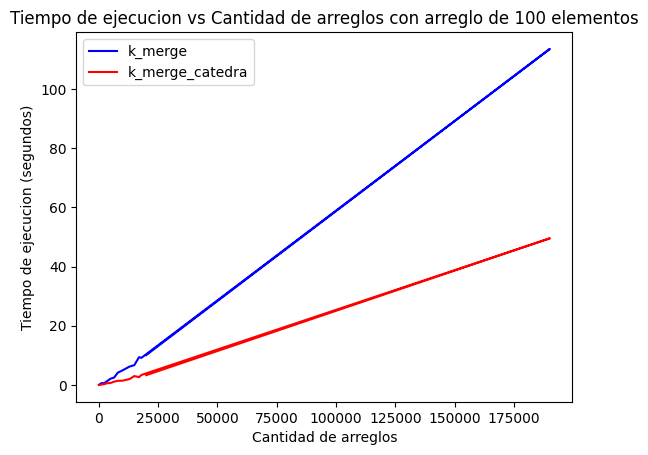

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 100 elementos')
pruebas = Pruebas()
ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementos,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],100)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementos,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],100)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 


### Prueba 2

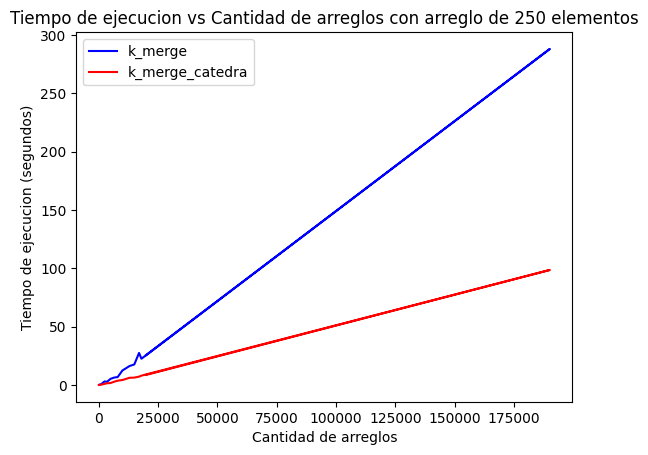

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos')
pruebas = Pruebas()
ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementos,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],250)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementos,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],250)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 3

Probamos lo mismo, una cantidad fija de elementos pero la cantidad de arreglos en aumento

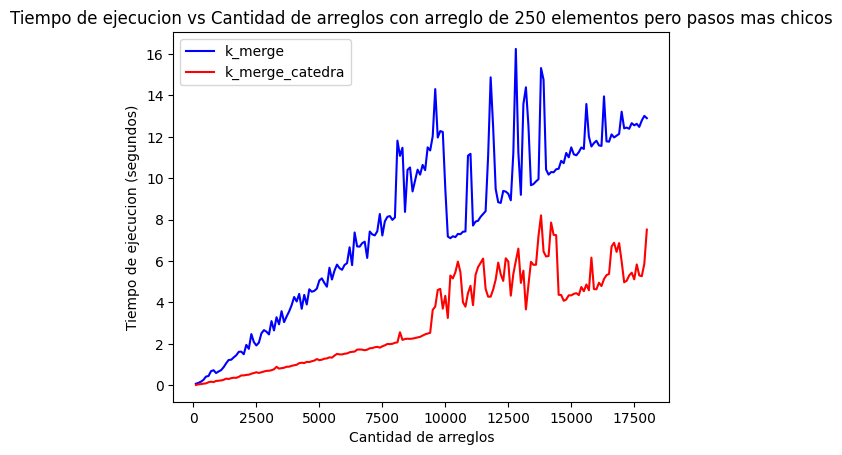

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos pero pasos mas chicos')
pruebas = Pruebas()
ks = []
for i in range(180):
    ks.append(100*(i+1))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementos,ks,250)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementos,ks,250)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 4 

Decidimos probar lo mismo, cantidad de arreglos en aumento con 250 elementos, pero decidimos extendernos un poco mas en la cantidad de arreglo, llegando hasta 50 mil arreglos

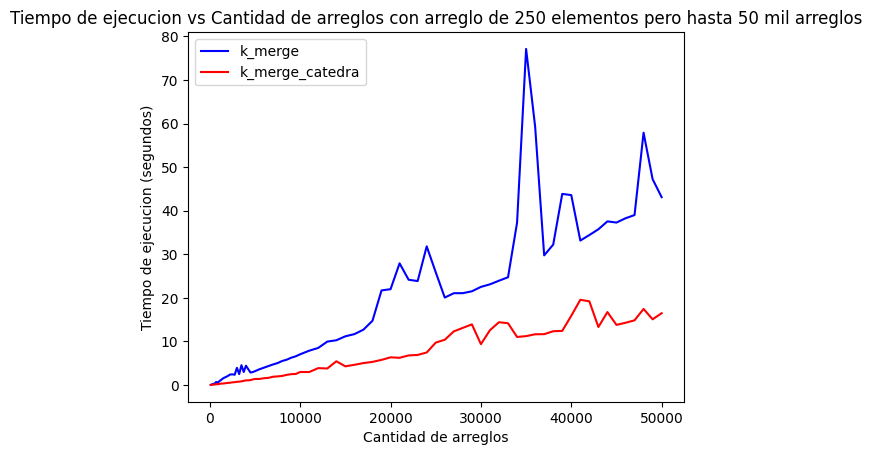

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos pero hasta 50 mil arreglos')
import numpy as np

arr1 = np.arange(100, 1000, 100)   
arr2 = np.arange(1000, 5000, 250)  
arr3 = np.arange(5000, 10000, 500)  
arr4 = np.arange(100, 50001, 1000)  

ks = np.concatenate((arr1, arr2, arr3, arr4))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementos,ks,250)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementos,ks,250)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 5

Decidimos probar lo mismo, cantidad de arreglos en aumento con un h fijo de 500 elementos por arreglo

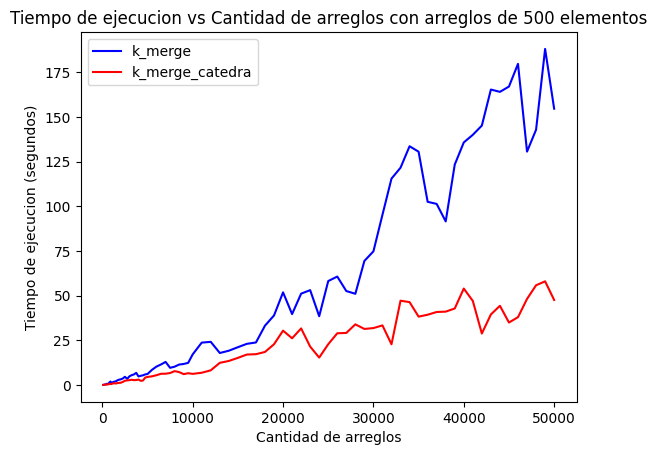

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglos de 500 elementos')
import numpy as np

arr1 = np.arange(100, 1000, 100)   
arr2 = np.arange(1000, 5000, 250)  
arr3 = np.arange(5000, 10000, 500)  
arr4 = np.arange(10000, 50001, 1000)  

ks = np.concatenate((arr1, arr2, arr3, arr4))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementos,ks,500)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementos,ks,500)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 6:

En este caso hacemos variar la cantidad de elementos por arreglo (h) manteniendo constante la cantidad de arreglos (k)

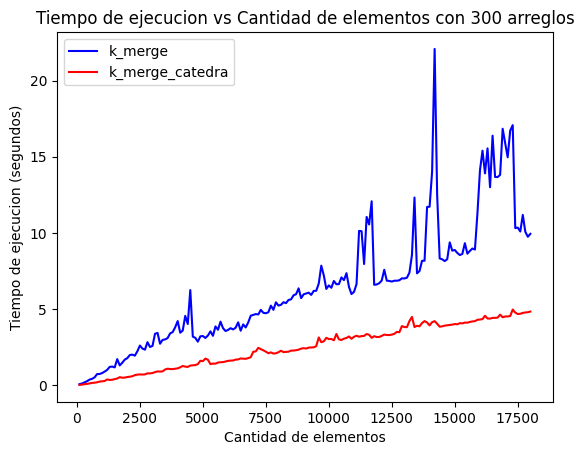

In [ ]:
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de elementos con 300 arreglos')
pruebas = Pruebas()
hs = []
for i in range(180):
    hs.append(100*(i+1))



hs1,times1 = probarFuncDiferenteH(k_merge,pruebas.probarKArreglosConHElementos,300,hs)

hs2,times2 = probarFuncDiferenteH(k_merge_catedra,pruebas.probarKArreglosConHElementos,300,hs)


plt.plot(hs1, times1, color='blue', label='k_merge')

plt.plot(hs2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 7

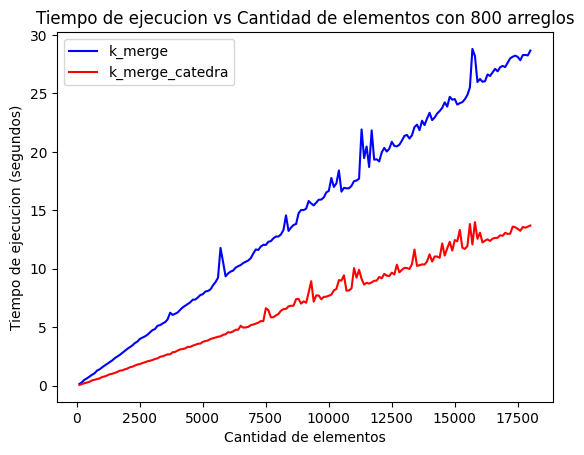

In [ ]:
##NO CORRER, DURA 1:40 hora

plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de elementos con 800 arreglos')
pruebas = Pruebas()
hs = []
for i in range(180):
    hs.append(100*(i+1))



hs1,times1 = probarFuncDiferenteH(k_merge,pruebas.probarKArreglosConHElementos,800,hs)

hs2,times2 = probarFuncDiferenteH(k_merge_catedra,pruebas.probarKArreglosConHElementos,800,hs)


plt.plot(hs1, times1, color='blue', label='k_merge')

plt.plot(hs2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 8:

En este caso, mantenemos constante la n, es decir, a medida que subimos k, disminuimos el h de manera proporcional. Un ejemplo seria con 200 arreglos 100 elementos. 400 arreglos 50 elementos y asi.

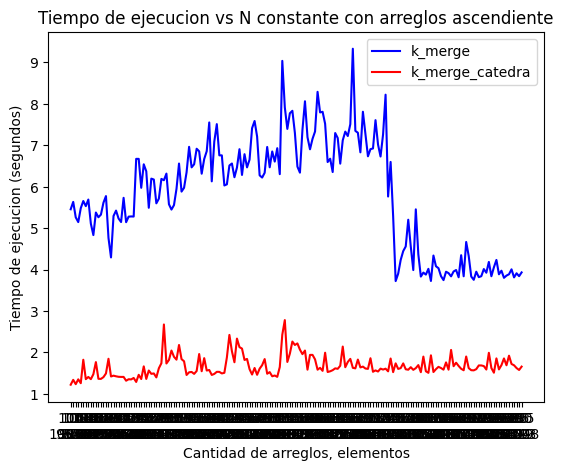

In [ ]:
import math

plt.xlabel('Cantidad de arreglos, elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs N constante con arreglos ascendiente')

n = 1003746  # Para que de un numero constante siempre
k = 100     
h = n // k 

increment = 5 

ks = []
hs = []

for i in range(180):
    ks.append(k)
    hs.append(h)
    k += increment
    h = n // k



pruebas = Pruebas()
ks_hs1,times1 = probarFuncNConstante(k_merge,pruebas.probarKArreglosConHElementos,ks,hs)
ks_hs2,times2 = probarFuncNConstante(k_merge_catedra,pruebas.probarKArreglosConHElementos,ks,hs)
plt.plot(ks_hs1, times1, color='blue', label='k_merge')
plt.plot(ks_hs2, times2, color='red', label='k_merge_catedra')
plt.legend()
plt.show() 


### Prueba 9

Ahora debemos probar al reves, osea aumentando la cantidad de elementos y bajando la cantidad de arreglos, manteniendo el n constante 

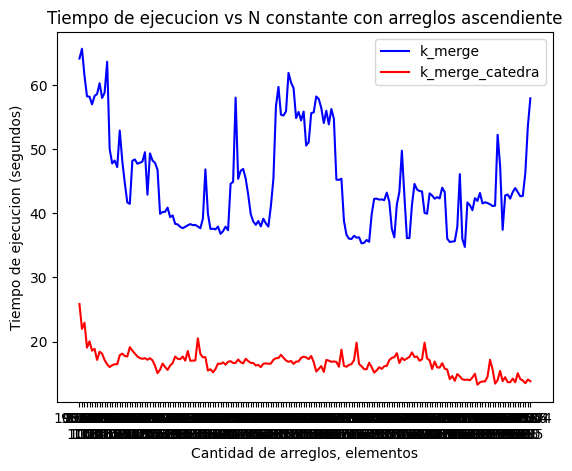

In [ ]:
import math

plt.xlabel('Cantidad de arreglos, elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs N constante con arreglos ascendiente')

n = 10003746  # Para que de un numero constante siempre
k = 100     
h = n // k 

increment = 5 

ks = []
hs = []

for i in range(180):
    ks.append(k)
    hs.append(h)
    k += increment
    h = n // k



pruebas = Pruebas()
ks_hs1,times1 = probarFuncNConstante(k_merge,pruebas.probarKArreglosConHElementos,hs,ks)
ks_hs2,times2 = probarFuncNConstante(k_merge_catedra,pruebas.probarKArreglosConHElementos,hs,ks)
plt.plot(ks_hs1, times1, color='blue', label='k_merge')
plt.plot(ks_hs2, times2, color='red', label='k_merge_catedra')
plt.legend()
plt.show() 


## Pruebas utilizando otra generacion de arreglos

En este caso, quisimos utilizar otra generacion de arreglos. Usando la semilla de time, podemos tener un comportamiento parecido al de random.

### Prueba 1

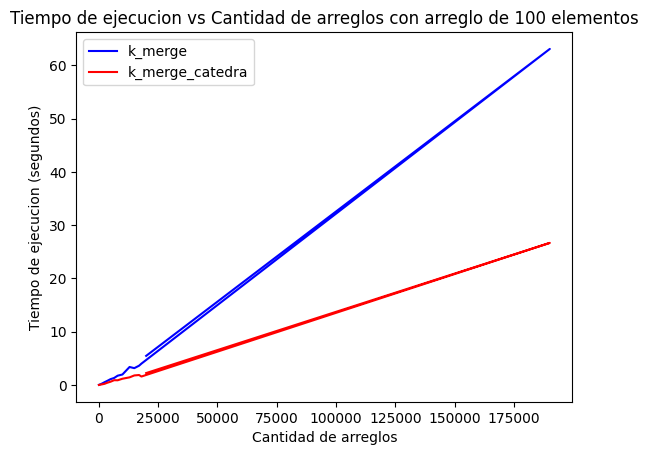

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 100 elementos')
pruebas = Pruebas()
ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],100)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],100)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show()

### Prueba 2

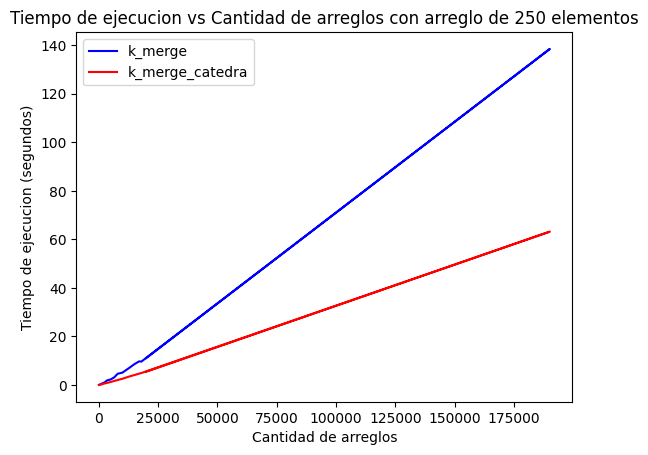

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos')
pruebas = Pruebas()
ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],250)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],250)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 3

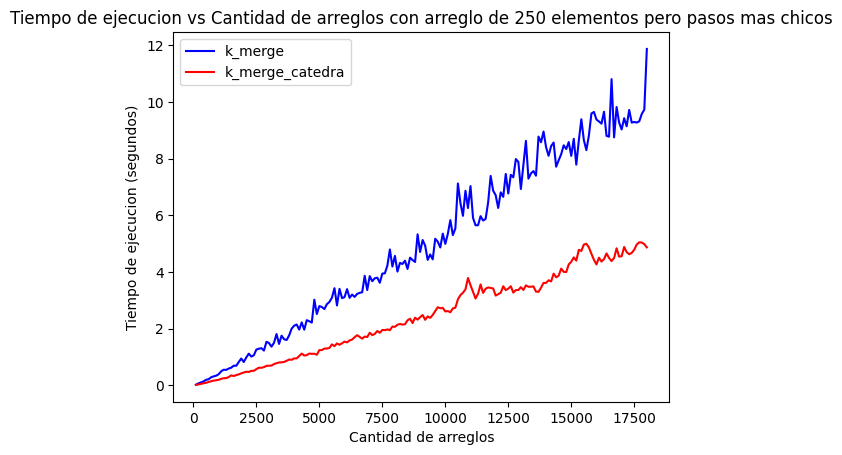

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos pero pasos mas chicos')
pruebas = Pruebas()
ks = []
for i in range(180):
    ks.append(100*(i+1))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,ks,250)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,ks,250)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 4

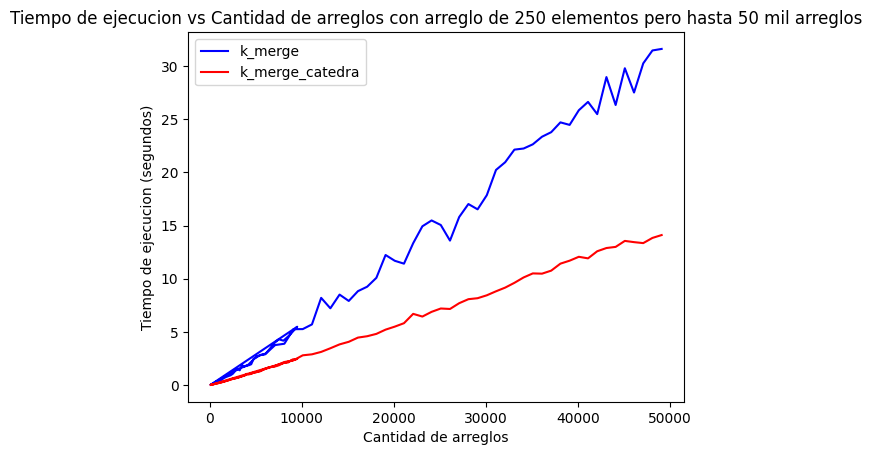

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos pero hasta 50 mil arreglos')
import numpy as np

arr1 = np.arange(100, 1000, 100)   
arr2 = np.arange(1000, 5000, 250)  
arr3 = np.arange(5000, 10000, 500)  
arr4 = np.arange(100, 50001, 1000)  

ks = np.concatenate((arr1, arr2, arr3, arr4))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,ks,250)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,ks,250)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 5

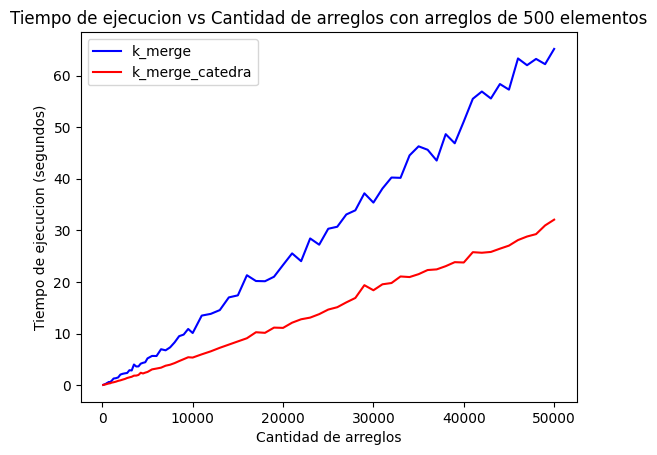

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglos de 500 elementos')
import numpy as np

arr1 = np.arange(100, 1000, 100)   
arr2 = np.arange(1000, 5000, 250)  
arr3 = np.arange(5000, 10000, 500)  
arr4 = np.arange(10000, 50001, 1000)  

ks = np.concatenate((arr1, arr2, arr3, arr4))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,ks,500)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,ks,500)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 6

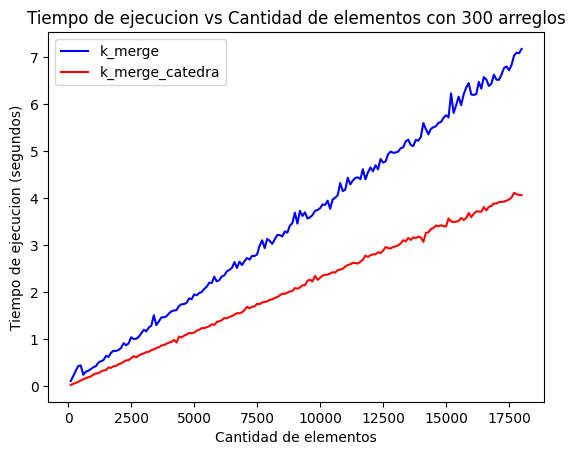

In [ ]:
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de elementos con 300 arreglos')
pruebas = Pruebas()
hs = []
for i in range(180):
    hs.append(100*(i+1))



hs1,times1 = probarFuncDiferenteH(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,300,hs)

hs2,times2 = probarFuncDiferenteH(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,300,hs)


plt.plot(hs1, times1, color='blue', label='k_merge')

plt.plot(hs2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 7

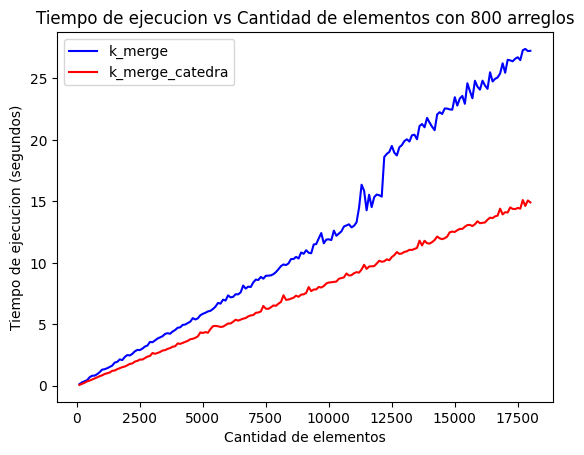

In [ ]:
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de elementos con 800 arreglos')
pruebas = Pruebas()
hs = []
for i in range(180):
    hs.append(100*(i+1))



hs1,times1 = probarFuncDiferenteH(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,800,hs)

hs2,times2 = probarFuncDiferenteH(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,800,hs)


plt.plot(hs1, times1, color='blue', label='k_merge')

plt.plot(hs2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show()

### 

### Prueba 8

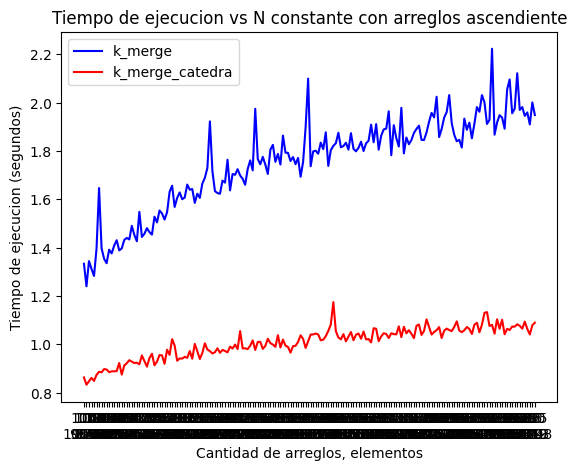

In [ ]:
import math

plt.xlabel('Cantidad de arreglos, elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs N constante con arreglos ascendiente')

n = 1003746  # Para que de un numero constante siempre
k = 100     
h = n // k 

increment = 5 

ks = []
hs = []

for i in range(180):
    ks.append(k)
    hs.append(h)
    k += increment
    h = n // k



pruebas = Pruebas()
ks_hs1,times1 = probarFuncNConstante(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,ks,hs)
ks_hs2,times2 = probarFuncNConstante(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,ks,hs)
plt.plot(ks_hs1, times1, color='blue', label='k_merge')
plt.plot(ks_hs2, times2, color='red', label='k_merge_catedra')
plt.legend()
plt.show() 

### Prueba 9

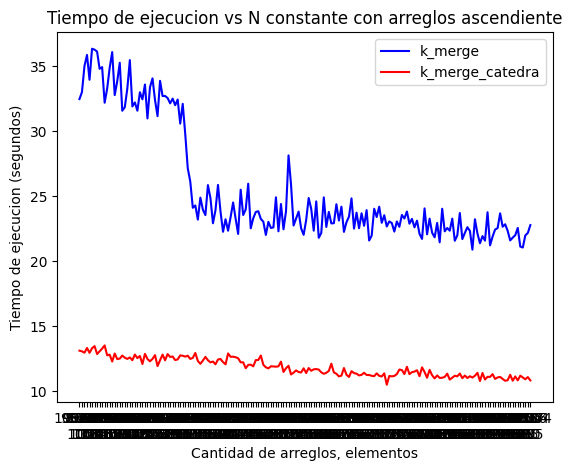

In [0]:
import math

plt.xlabel('Cantidad de arreglos, elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs N constante con arreglos ascendiente')

n = 10003746  # Para que de un numero constante siempre
k = 100     
h = n // k 

increment = 5 

ks = []
hs = []

for i in range(180):
    ks.append(k)
    hs.append(h)
    k += increment
    h = n // k



pruebas = Pruebas()
ks_hs1,times1 = probarFuncNConstante(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,hs,ks)
ks_hs2,times2 = probarFuncNConstante(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,hs,ks)
plt.plot(ks_hs1, times1, color='blue', label='k_merge')
plt.plot(ks_hs2, times2, color='red', label='k_merge_catedra')
plt.legend()
plt.show() 

## Mismas pruebas pero con diferente rango

### Prueba 1

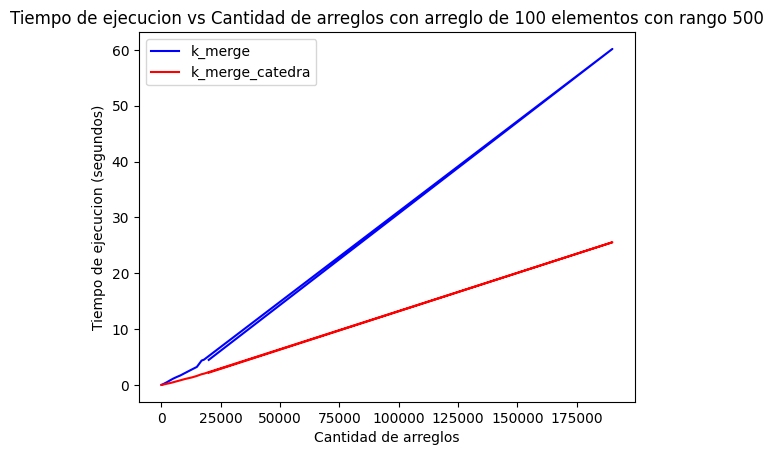

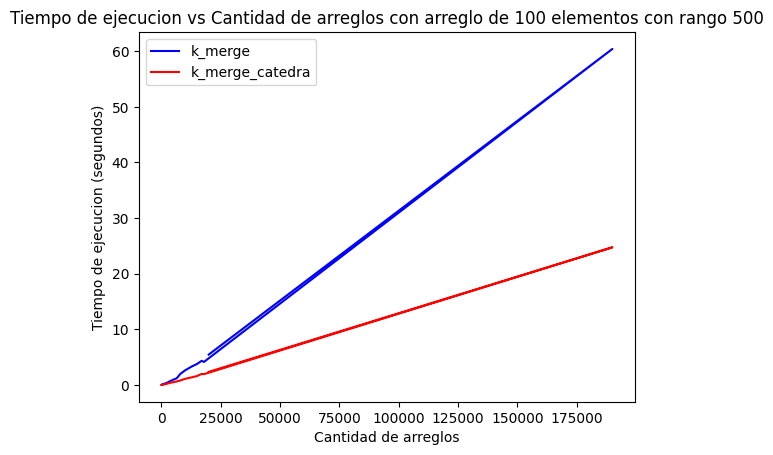

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 100 elementos con rango 500')
pruebas = Pruebas()
ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],100,500)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],100,500)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show()

### Prueba 2

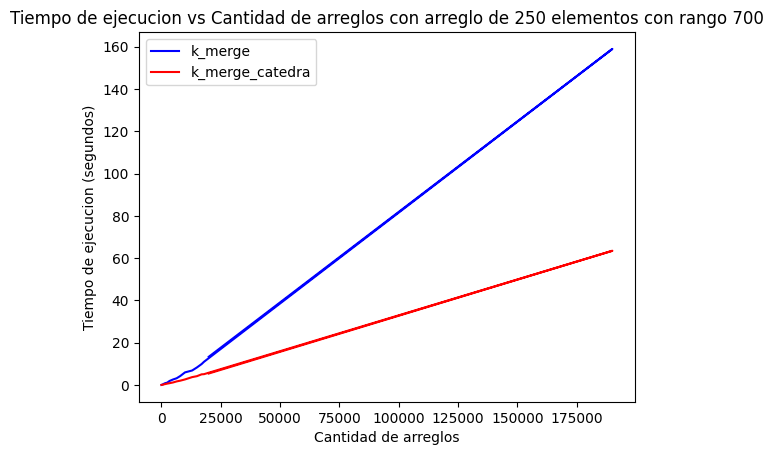

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos con rango 700')
pruebas = Pruebas()
ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],250,700)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,[100,200,300,400,500,700,900,1200,1600,2500,3500,5000,6500,8000,10000,13000,15000,17000,18000,190000,20000],250,700)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show()

### Prueba 3

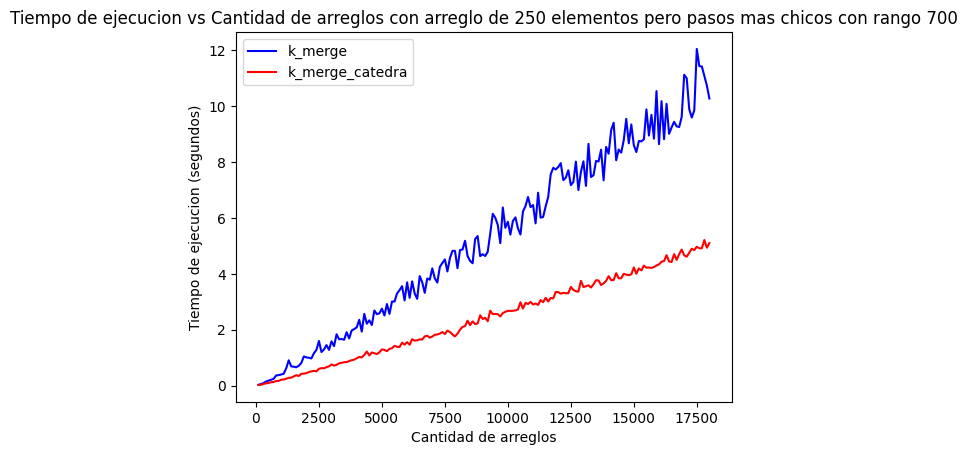

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos pero pasos mas chicos con rango 700')
pruebas = Pruebas()
ks = []
for i in range(180):
    ks.append(100*(i+1))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,ks,250,700)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,ks,250,700)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 4

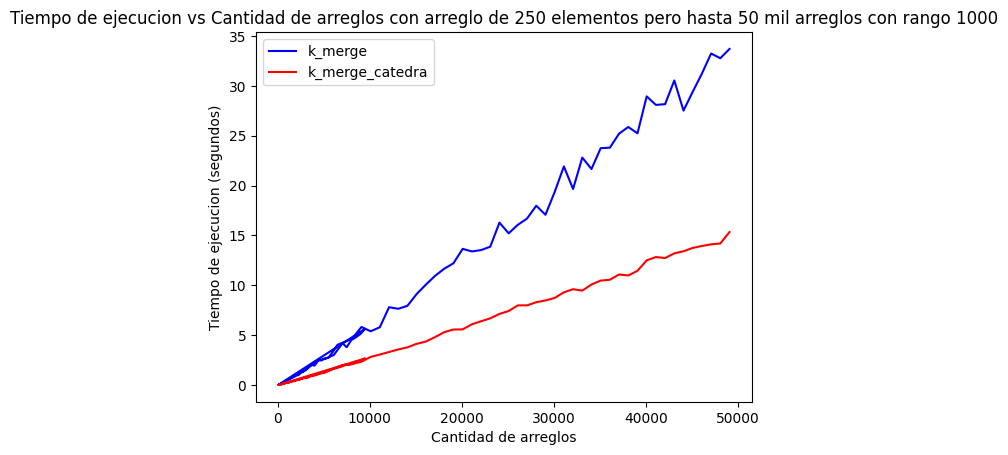

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglo de 250 elementos pero hasta 50 mil arreglos con rango 1000')
import numpy as np

arr1 = np.arange(100, 1000, 100)   
arr2 = np.arange(1000, 5000, 250)  
arr3 = np.arange(5000, 10000, 500)  
arr4 = np.arange(100, 50001, 1000)  

ks = np.concatenate((arr1, arr2, arr3, arr4))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,ks,250,1000)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,ks,250,1000)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 5

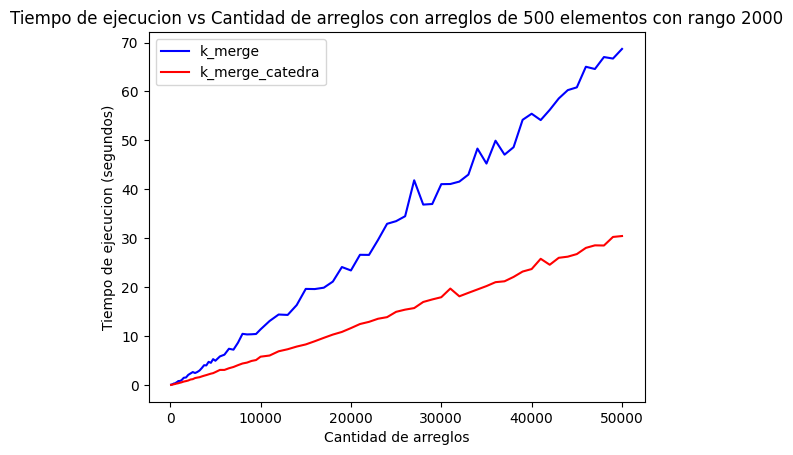

In [ ]:
plt.xlabel('Cantidad de arreglos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de arreglos con arreglos de 500 elementos con rango 2000')
import numpy as np

arr1 = np.arange(100, 1000, 100)   
arr2 = np.arange(1000, 5000, 250)  
arr3 = np.arange(5000, 10000, 500)  
arr4 = np.arange(10000, 50001, 1000)  

ks = np.concatenate((arr1, arr2, arr3, arr4))

ks1, times1 = probarFunc(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,ks,500,2000)
ks2, times2 = probarFunc(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,ks,500,2000)

plt.plot(ks1, times1, color='blue', label='k_merge')
plt.plot(ks2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show()

### Prueba 6

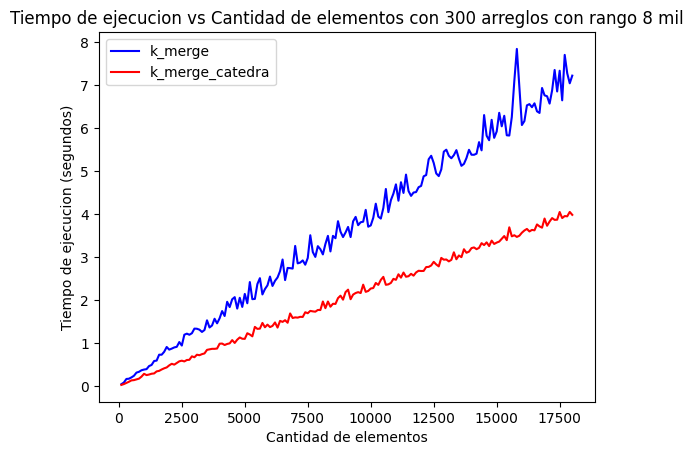

In [ ]:
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de elementos con 300 arreglos con rango 8 mil')
pruebas = Pruebas()
hs = []
for i in range(180):
    hs.append(100*(i+1))



hs1,times1 = probarFuncDiferenteH(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,300,hs,8000)

hs2,times2 = probarFuncDiferenteH(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,300,hs,8000)


plt.plot(hs1, times1, color='blue', label='k_merge')

plt.plot(hs2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show() 

### Prueba 7

In [ ]:
plt.xlabel('Cantidad de elementos')
plt.ylabel('Tiempo de ejecucion (segundos)')
plt.title('Tiempo de ejecucion vs Cantidad de elementos con 800 arreglos con rango 15 mil')
pruebas = Pruebas()
hs = []
for i in range(180):
    hs.append(100*(i+1))



hs1,times1 = probarFuncDiferenteH(k_merge,pruebas.probarKArreglosConHElementosSemillaTime,800,hs,15000)

hs2,times2 = probarFuncDiferenteH(k_merge_catedra,pruebas.probarKArreglosConHElementosSemillaTime,800,hs,15000)


plt.plot(hs1, times1, color='blue', label='k_merge')

plt.plot(hs2, times2, color='red', label='k_merge_catedra')

plt.legend()
plt.show()

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49bea084-701b-4816-b8e7-98fc0bdbf6c8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>